# Exploring predict_tile parameters using a portion of input image

Today we have some great data from Australian Eucalyptus forests. Let's walk through the steps to get some predictions. The first thing I did was look at the tile in QGIS to get a sense of the resolution (5cm), habitat type and image quality. Then I started with our standard boilerplate DeepForest prediction code from the 'Getting Started' page. In each of the code snippets below, *I show the entire code used to create the output*, which reflects what I'm really doing during debugging, which is trying a set of parameters, viewing the output and re-running. Using a GPU, the following notebook takes about 8 minutes to run.

In [1]:
from deepforest import main
from matplotlib import pyplot as plt
m = main.deepforest()

m.use_release()
try:
    image = m.predict_tile(raster_path="/orange/ewhite/DeepForest/Wagner_Australia/Plot13Ortho.tif", patch_size=500, patch_overlap=0, return_plot=True)
    plt.imshow(image[:,:,:3])
except Exception as e:
    print(e)


Reading config file: /orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/deepforest/data/deepforest_config.yml
No validation file provided. Turning off validation loop


/orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /orange/ewhite/b.weinstein/miniconda3/envs/DoubleCou ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are fou

Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0
Only three band raster are accepted. Channels should be the final dimension. Input tile has shape (15399, 14775, 4). Check for transparent alpha channel and remove if present


Here we get some error messages saying that the input raster image has four bands. This is pretty common for data that was exported from tools that create orthomosaics, like AgiSoft and Pix4d. Most programs have a toggle button for turning of the 'alpha channel'. We can use rasterio to open up the image and just select the bands we want.

In [2]:
from deepforest import main, utilities, visualize
import rasterio as rio
from matplotlib import pyplot as plt
import cv2

m = main.deepforest()
m.use_release()
# Make into a 3 page, remove alpha channel, and make channels last
r = rio.open("/orange/ewhite/DeepForest/Wagner_Australia/Plot13Ortho.tif").read()
r = r[:3,:,:]
r = r.transpose(1,2,0)

#boxes = m.predict_tile(image=r, patch_size=700, patch_overlap=0.2, iou_threshold=0.5)

Reading config file: /orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/deepforest/data/deepforest_config.yml


/orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /orange/ewhite/b.weinstein/miniconda3/envs/DoubleCou ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


Its starts to run, but wow that's going to take too long on CPU for me to write this post. On GPU this might only take 2mins, but with a CPU almost an hour according to progress bar. Kill that and let's come back to the full prediction set when we are happy.

## Crop a small portion to work with

Reading config file: /orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/deepforest/data/deepforest_config.yml
No validation file provided. Turning off validation loop


/orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /orange/ewhite/b.weinstein/miniconda3/envs/DoubleCou ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


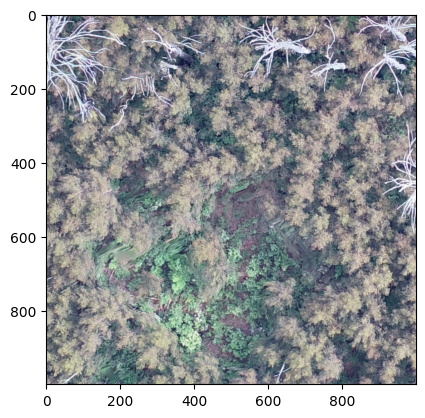

/orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /orange/ewhite/b.weinstein/miniconda3/envs/DoubleCou ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]
/orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 4/4 [00:05<00:00,  0.78it/s]
215 predictions in overlapping windows, applying non-max supression
129 predictions kept after non-max suppression


/orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/deepforest/utilities.py:399: UserWarning: flip_y_axis is True, and projected is True. In most cases, projected should be False when inverting y axis. Setting projected=False
  warnings.warn(
/orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


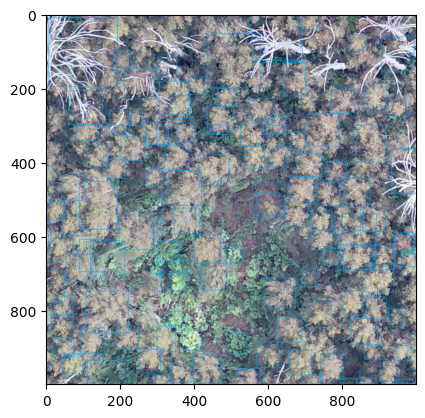

In [4]:
from deepforest import main
from deepforest import utilities
from deepforest import visualize
import rasterio as rio
from matplotlib import pyplot as plt
import cv2

m = main.deepforest()
m.use_release()
# Make into a 3 page, remove alpha channel, and make channels last
r = rio.open("/orange/ewhite/DeepForest/Wagner_Australia/Plot13Ortho.tif").read()
r = r[:3,:,:]
r = r.transpose(1,2,0)

#Grab a portion of image just to test, near the middle
r = r[12000:13000,6000:7000,:]
plt.imshow(r)
plt.show()

# save the image as numpy array
cv2.imwrite("/orange/ewhite/DeepForest/Wagner_Australia/Plot13Ortho_crop.tif", r)
m.config
boxes = m.predict_tile(image=r, patch_size=700, patch_overlap=0.2, iou_threshold=0.5)
boxes["image_path"] = "Plot13Ortho_crop.tif"
gdf = utilities.boxes_to_shapefile(boxes, root_dir="/orange/ewhite/DeepForest/Wagner_Australia", flip_y_axis=True)

plot = visualize.plot_predictions(image=r, df=gdf, color=(0, 165, 255))
plt.imshow(plot)
plt.show()

This is a decent start for zero-shot imagery in a new resolutions. Let's try a couple things. To see if we can make it any better without new annotations. We always say that DeepForest is best used as a backbone, and an hour of new annotation on target imagery and gentle finetuning will produce better results than changing.  hyperparameters. 

# Make geospatial predictions on the full tile

Now that i'm happy with a small crop, I want to make predictions on the entire image. This will take some time. We can do away with the cropping of the image, as well as flipping the y axis, since the coordinates are now in the geospatial projection of the tile.


In [6]:
from deepforest import main
from deepforest import utilities
from deepforest import visualize
import rasterio as rio
from matplotlib import pyplot as plt
import cv2

m = main.deepforest()
m.use_release()
# Make into a 3 page, remove alpha channel, and make channels last
r = rio.open("/orange/ewhite/DeepForest/Wagner_Australia/Plot13Ortho.tif").read()
r = r[:3,:,:]
r = r.transpose(1,2,0)

boxes = m.predict_tile(image=r, patch_size=700, patch_overlap=0.2, iou_threshold=0.5)
boxes["image_path"] = "Plot13Ortho.tif"
gdf = utilities.boxes_to_shapefile(boxes, root_dir="/orange/ewhite/DeepForest/Wagner_Australia")

Reading config file: /orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/deepforest/data/deepforest_config.yml


/orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /orange/ewhite/b.weinstein/miniconda3/envs/DoubleCou ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


/orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /orange/ewhite/b.weinstein/miniconda3/envs/DoubleCou ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]
/orange/ewhite/b.weinstein/miniconda3/envs/DoubleCounting/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 756/756 [00:29<00:00, 25.20it/s]
33053 predictions in overlapping windows, applying non-max supression
23887 predictions kept after non-max suppression


In general I would look at this in QGIS, its much easier to zoom. Just for the sake of showing how its done, we can overlay the geospatial predicts on the large image

In [12]:
gdf.plot(color="red", alpha=0.5)

(15399, 14775, 3)


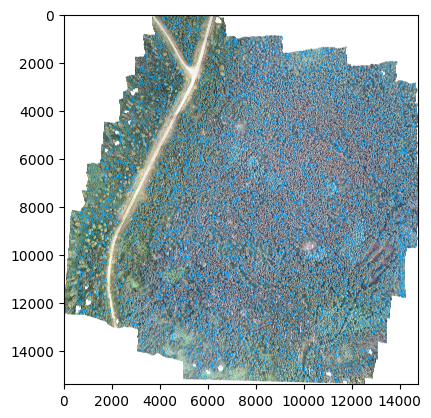

In [19]:
from deepforest import visualize
plotted_image = visualize.plot_predictions(image=r, df=boxes, color=(255, 165, 0), thickness=3)
plt.imshow(plotted_image)